# Реализация системы распознавания лиц
## Дипломный проект Гринева Дмитрия
![](https://3dnews.ru/assets/external/illustrations/2018/02/08/965342/sm.thumbnail_1518065961.750.jpg)

Трудно себе представить современный мир без искуственного интеллекта. Глубокие нейросети проникли во все сферы бизнеса и получили широкое применение в задачах компьютерного зрения (__Computer Vision__) к которым относятся системы идентификации по биометрическим признакам (лицу) или попросту - __системы распознавания лиц__ (FRS).

Системы распознавания лиц решают две задачи:
- __Верификация__ - 1 к 1 сравнение двух лиц между собой
- __Идентификация__ - 1 к n поиск в базе данных известных лиц

### Области применения
1. __Контроль доступа__ - Применяется для управления конечными устройствами системы (турникеты, шлагбаумы, калитки и т.п.) как самостоятельно так и в сочетании с двухфакторной аутентификацией пользователя (по пропуску, отпечатку пальца и т.д.)
2. __Онлайн шоппинг__ - Компания Alibaba планирует использовать свою платформу Alipay для совершения покупок через интернет. Компания уже запустила свою систему распознавания лиц __Smile to Pay__ в KFC города Ханчжоу. Система распознает лицо в течении пары секунд и затем верефицирует лицо, присылая соответствующее сообщение на мобильный телефон.
3. __Поиск преступников__ - Одна из самых популярных областей применения систем правоохранительными органами по всему миру. Сигналы с камер городского наблюдения, транспорта стекаются в ситуационные центры, где проводится поиск лиц по существующей базе преступников или нежелательных элементов и операторам выводятся соответствующие сработки для реагирования.
4. __Черный список__ - Может быть использована для отказа доступа на объект или общественное мероприятие лицам, ранее привлекаемых за хулиганство, неадекватное поведение и т.п.
5. __Организация фотографий__ - Можно группировать семейные фотографии, находить на них друзей, родственников и т.п.
6. __Посещаемость занятий__ - В Англии широкое применение системы распознавания лиц нашли в области отслеживания посещения студентами школ, вузов. Достаточно в конце учебного дня провести поиск по архиву распознанных за день лиц студентов и вывести тех, кого не оказалось в архиве.

## Пайплайн FRS
![](imgs/pipeline.jpg)

Пайплайн распознавания лиц может быть разделен на 3 основные части:
- **Детекция лица на изображении с ключевыми точками**
- **Выравнивание лица по ключевым точкам и обрезание до входного размера сети извлечения вектора лица**
- **Извлечение вектора лица с кропнутого изображения**
- Идентификация или верификация лица

### Методы детекции лица (Face Detection)

Метод детекции лиц используется для поиска лиц, присутствующих на данном изображении, извлечения лиц, если они есть, и обрезки лица для дальнейшего извлечения признаков. Существуют различные варианты алгоритмов для выполнения этой задачи в системе обнаружения / распознавания лиц.

### Методы, используемые при детекции лиц
**Каскады Хаара**: Детектор лиц на основе каскада Хаара был самым современным в обнаружении лиц в течение многих лет с 2001 года, когда он был представлен Виолой и Джонсом в их статье «Rapid Object Detection using a Boosted Cascade of Simple Features». За последние годы было сделано много улучшений.
Этот метод имеет простую архитектуру, которая работает на ЦП почти в реальном времени. Кроме того, он может обнаруживать изображения в разных масштабах. Но главный недостаток в том, что он дает ложные результаты, а также не работает с нефронтовыми изображениями.

**Dlib (HOG)**: это широко используемая модель распознавания лиц,
основан на функциях HoG и SVM, опубликованных в 2005 году в статье «Histograms of oriented gradients for human detection». HOG или гистограмма направленных градиентов - это дескриптор объекта, который часто используется для извлечения признаков из изображения. Это самый быстрый метод на ЦП, который может работать как с фронтальными, так и с немного не фронтальными изображениями.
Но он не способен обнаруживать маленькие изображения и обрабатывать окклюзии. Кроме того, при обнаружении часто исключаются некоторые части подбородка и лба.

**Dlib (CNN)**: этот метод, впервые представленный в статье 2016 г. «CNN based efficient face recognition technique using Dlib», использует Maximum-Margin Object Detector (MMOD) с признаками, полученными при помощи сверточных нейронных сетей. Процесс обучения этого метода очень прост, и вам не потребуется большой объем данных для обучения пользовательского детектора объектов. Он очень быстро работает на GPU и способен работать с различными положениями лиц в кадре. Но основным недостатком является то, что он обучен минимальному размеру лица 80 * 80, поэтому он не может обнаруживать маленькие лица на изображениях. Также у данного метода медленный инференс на CPU.

**MTCNN**: Multi-task Cascaded Convolutional Networks (MTCNN) - это фреймворк, разработанный для решения как задачии обнаружения лиц в кадре, так и их выравнивания.
Этот метод был впервые представлен в статье под названием «Joint Face Detection and Alignment using Multi-task Cascaded Convolutional Networks» в 2016 году. Этот метод дает наиболее точные результаты из всех четырех методов. Он работает с различными положениями лиц на изображениях, и может обнаруживать их в различных масштабах. Он не имеет серьезных недостатков как таковых, но работает сравнительно медленнее, чем HOG и каскады Хаара. Долгое время MTCNN был **sota** решением в детекции лиц, пока ему на смену в 2019 году не пришла **RetinaFace**, которая по сей день является для многих является **baseline** в детекции лиц.

**RetinaFace**: RetinaFace: Single-shot Multi-level Face Localisation in the Wild - как видно из названия, за основу был взял детектор объектов **RetinaNet**, который был адаптирован под задачу детекции лиц и предсказания 5 ключевых точек лица, а также 3D реконструкции маски лица. Данный детектор показывает точность на Wider Face (HARD) **0.914**, что является sota и по сей день.

### Выравнивание лица (Face Aligment)

Выравнивание лица является неотъемлимой частью пайплайна и выполняется перед передачей полученного из кадра лица в сеть извлечения признаков - **эмбеддинга** лица, т.е. вектора заданной размерности. В своих исследованиях Google обнаружили, что выравнивание лиц повышает точность модели распознавания FaceNet с 98,87% до 99,63%. Это увеличение точности почти на 1 процент.
Для выравнивания лица достаточно получить координаты глаз и использовать правило косинуса по формуле:

![](https://i2.wp.com/sefiks.com/wp-content/uploads/2020/02/angelina-cosine-rule.jpg?resize=560%2C325&ssl=1)

**cos(A) = (b2 + c2 – a2 ) / (2bc)**

После этого спокойно получаем угол, на который нужно повернуть изображение, используя простой код:
`
angle = np.arccos(cos_a)
angle = (angle * 180) / math.pi # переводим из радиан в градусы

`
    
Кроме того, выравнивание лица может быть выполнено аффинным преобразованием, например, как сделали в библиотеке **insightface**:

    src = np.array([ 
        [30.2946, 51.6963], 
        [65.5318, 51.5014], 
        [48.0252, 71.7366], 
        [33.5493, 92.3655], 
        [62.7299, 92.2041] ], dtype=np.float32 ) 
    if image_size[1]==112: 
        src[:,0] += 8.0 
    dst = landmark.astype(np.float32) 
    
    tform = trans.SimilarityTransform() 
    tform.estimate(dst, src) 

### Извлечение признаков лица (Feature Extraction)

Извлечение признаков является основным и наиболее важным этапом в пайплайне распознавания лиц. Он извлекает биометрические признаки вашего лица. Эти признаки - особенности вашего лица, которые различаются от человека к человеку. Существуют различные методы извлечения признаков (эмбеддингов). Обычно используются размеры эмбеддинга кратные 2 - 128, 256, 512 и т.п. 
Задача извлечения признаков лица сводится к тренировке такого бэкбона, который обеспечит нас удобными векторами лиц, которые можно сравнивать. Для тренировки используется функция потерь — математическая функция, которая говорит, насколько хорошо наша текущая сеть справляется с задачей. Значение функции — штраф (чем он меньше — тем лучше), а переменные — параметры сети.
В DNN сетях существует два основных подхода к задаче получение векторов лиц: обучение метрики (metric learning) и решение задачи классификации.

**Обучение метрики**

В случае обучения метрики, мы заставляем сеть увеличивать расстояние между фотографиями разных людей и уменьшать его между фотографиями одного и того же человека. Самый известный пример — **Triplet Loss**, которую предложили в 2015 году представители Google в своей работе **FaceNet**:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/933c19129ec9060b0e7ea6f54f715c4c92010399)

A - якорное изображение лица, P - позитивный пример того же человека, N - пример другого человека, alpha - некая константа, которая отвечает за минимальное расстояние между позитивной и негативной парами.

**Классификация**

Для решения задачи классификации необходимо добавить к нашей backbone сети полносвязный слой для классификации, затем обучить сеть классифицировать людей (каждый класс — отдельный человек), затем необходимо удалить этот слой, и окажется, что последний полносвязный слой, который был перед нашим классификационным слоем будет выдавать верные эмбеддинги лица, размер которых будет равен размеру полносвязного слоя.
На практике оказалось, что данный подход показывает лучше результаты чем triplet loss и все современные sota решения обучены именно с применением этого подхода.

Классический подход к обучению сети в задаче классификации является функция потерь Softmax Loss, она же CrossEntropy + Softmax activation:

![](https://habrastorage.org/getpro/habr/formulas/ee1/f47/6d6/ee1f476d6798519f6dd4ab116d9fa32f.svg)

Обучение с обычным softmax loss имеет одну очень важную проблему - сеть ровно разделит классы между собой и у каждого человека будет свое пространство, в которое будут попадать векторы его лица (в идеале). Границы этих пространств могут быть близки друг к другу. Расстояние (угол) между изображениями на границах близких классов может быть меньше, чем расстояние между некоторыми изображениями одного класса, а это серьезная проблема.

Первым шагом к решению данной проблемы стала функция потерь Normalized Softmax:

![](https://habrastorage.org/getpro/habr/formulas/d52/5ab/262/d525ab262a306fc24a7a3cb5ba41809d.svg)

Здесь вводится понятие нормы лица **scale** ![](https://habrastorage.org/getpro/habr/formulas/ff5/d1a/01d/ff5d1a01d9102761a0a84024b068caaa.svg) - первый гиперпараметр функции потерь.

Далее появилась идея добавить между пространствами классов некоторую пустую область (decision margin). Размер этой области — margin — второй главный гиперпараметр функции потерь. Графически на нашей 2D гиперсфере это выглядит так:

![](https://habrastorage.org/r/w1560/webt/kp/ic/vd/kpicvd1vebzshxykvcwuapx67q4.jpeg)
<br>
Рисунок из статьи [https://arxiv.org/abs/1801.07698](ArcFace) Слева - без margin, справа - с margin.
</br>

Теперь между классами есть пустая область, и граничные изображения одного класса далеко до изображений других классов. В данном случае речь идет об углах между векторами, поэтому margin (обозначим $m$) можно добавить в три места в функцию потерь:

1. Домножить на угол. Данный вариант использовался в одной из первых работ Margin-based loss **SphereFace**. Функция потерь выглядит так:

![](https://habrastorage.org/getpro/habr/formulas/e46/aa1/066/e46aa106627de0e9e1a4b4ea5c3f9253.svg)

2. Отнять margin от косинуса угла. Данный подход был применен в двух работах: **CosFace** и **AM-SoftMax**:

![](https://habrastorage.org/getpro/habr/formulas/ffe/baa/e81/ffebaae81d7ddfa001d7b36291f95721.svg)

3. Прибавить margin к углу. Данная идея реализована в текущем sota подходе **ArcFace**:

<img src="imgs/arcface.jpg" alt="drawing" width="500"/>

В обзоре https://arxiv.org/pdf/1901.05903 тесты на **LFW** показывают следующие результаты:
<table>
<thead>
<tr>
<th>Loss</th>
<th>Resnet50-MSC</th>
<th>MobileNet-MSC</th>
<th>Resnet50-Casia</th>
<th>MobileNet-Casia</th>
</tr>
</thead>
<tbody>
<tr>
<td>AM-Softmax/CosFace</td>
<td><strong>99.3</strong></td>
<td>97.65</td>
<td>99.34</td>
<td>98.46</td>
</tr>
<tr>
<td>ArcFace</td>
<td>99.15</td>
<td><strong>98.43</strong></td>
<td><strong>99.35</strong></td>
<td><strong>99.01</strong></td>
</tr>
<tr>
<td>SphereFace</td>
<td>99.02</td>
<td>96.86</td>
<td>99.1</td>
<td>97.83</td>
</tr>
</tbody>
</table>

В статье https://arxiv.org/pdf/1804.06655.pdf приводится история развития функций потерь:

![](imgs/losses_history.png)

Использование функции потерь ArcFace и по сей день является одним из sota подходов в т.н. **represenation stage** пайплайна распознавания лиц.

### Нейросетевые методы извлечения признаков лица (face embeddings)

В 2014 и 2015 годах было множество исследований и публикаций по методам глубокого обучения для распознавания лиц. Сверточные сети быстро достигли точности, близкой к человеческому уровню, а затем превосходили его в течении трех лет на стандартном датасете для распознавания лиц - **Labeled Faces In The Wild**.
Ключевыми игроками в вопросе распознавания лиц были: DeepFace, DeepID, VGGFace и FaceNet.

**VGGFace**: дескрипторы лиц в VGG-Face вычисляются с использованием реализации CNN на основе VGG-Very-Deep-
16 CNN и валидируются на наборах данных **LFW** и **YouTube Faces**. VGG использует различные архитектуры, такие как VGGFace1, VGGFace2 от Keras. Основное различие между этими моделями заключается в количестве слоев, включенных в их архитектуру, которое варьируется от модели к модели.

**FaceNet**: FaceNet - модель, разработанная в 2015 году исследователями Google в их статье 2015 года под названием «FaceNet: A Unified Embedding for Face Recognition and Clustering».
В данной работе исследователи Google предложили новую функцию потерь - **Triplet loss**, которая позволила обучать непосредственно embedding лица. В момент появления данная модель показала sota результаты с 128-байтовым вектором лица. На наборах данных **LFW** модель достигла точности 99.63%, а на **YouTube Faces DB** - 95.12%.

**DeepFace**: DeepFace - была описана в документе 2014 года «DeepFace: Closing the Gap to Human-Level Performance in Face Verification». В своей работе авторы уделили особое внимание шагу выравнивания лица и использовали 3D-моделирование лица для последующего аффинного преобразования. На датасете **LFW** они получили точность 97,35%.

**DeepID**: DeepID - это серия систем (например, DeepID, DeepID2 и т.д.). Описана в статье 2014 года «Deep Learning Face Representation from Predicting 10,000 Classes». Данная сеть предсказывает 5 точек лица, по которым идет выравнивание лица аффинным преобразованием (используются центры глаз и точка между уголков рта). Эмбеддинги извлекаются из 60 патчей лиц с 10 областями, тремя масштабами, в RGB или GRAYSCALE. Авторы обучали 60 ConvNets, каждая из которых извлекала два 160-мерных вектора DeepID из определенного патча и его горизонтально развернутый аналог. Общая длина вектора DeepID - 19,200 (160х2х60), который далее подается на верификацию с использованием подхода, описанного в статье 2012 года «Bayesian face revisited: A joint formulation». Достигли точности 97,45% на **LFW**.

**OpenFace**: OpenFace - фрэймворк, описанный в 2016 года в статье «OpenFace: An open source facial behavior analysis toolkit». Пайплайн данного фрэймворка включает в себя детектор лица, предсказание 68 ключевых точек лица, оценку направления взгляда, оценку положения головы, выравнивание лица, оценку выражения лица (action units). Из выравненного лица размера 112х112 извлекаются дескрипторы HOG и получается 4464-D вектор, который потом сжимается при помощи PCA до размерности 1391. Далее можно использовать SVM для классификации.

**InsightFace**: InsightFace - open-source решение для аналитики в области распознавания лиц основанный на Pytorch и MXNet. Авторы детектора **RetinaFace** и функции потерь **ArcFace**. На текущий момент это лучший **baseline** для создания системы распознавания лиц. У авторов есть хороший зоопарк обученных моделей, который можно взять под свои нужды, либо взять имплементации на pytorch, tf2 и обучить на своем датасете.

### Идентификация лиц
После того как мы получили эмбеддинг лица прогнав фотографию через нашу нейросеть мы должны его идентифицировать - сравнить со всеми имеющимися в нашей базе эмбеддингами лиц. Данную задачу можно решить несколькими подходами:

1. Померить евклидово / косинусное расстояние между текущим эмбеддингом и всеми эмбеддингами, которые хранятся в нашей базе данных. В качесте ответа выбрать идентификатор, который имеет наименьшее расстояние между указанными эмбеддингами. Как мы понимаем, данный подход будет вполне работать на небольших объемах данных, но когда речь пойдет о сотнях тысяч и миллионах - тут будет большая проблема в скорости поиска. На миллионной выборке на моем компьютере уходит 56 секунд для поиска 1 вектора.

2. Обучить классификатор (SVM, RandomForest) и обучить предсказывать id класса. В данном подходе эмбеддинг используется как фичи для обучения классификатора. У данного подхода есть недостаток - нужно достаточное количество векторов одного класса в базе, чтобы классификатор обучился с нужной точностью.

3. Использование специальных библиотек поиска похожих векторов, таких как **Faiss**, **ScaNN**, **NMSLIB**, **Annoy**, **HNSW**. Данный библиотеки позволяют строить обучаемые индексы векторов поиск по которым осуществляется за доли секунд.


In [ ]:
# Пример поиска эмбеддингов в базе полным перебором
import numpy as np
from scipy.spatial import distance

np.random.seed(42)

DIM = 512 # размер эмбеддинга лица
NUM = 10000 # количество векторов в базе
embeddings = np.random.random((NUM, DIM)).astype('float32')

# Ищем максимально похожий вектор
def get_similar_vector(embedding, embeddings_db):
    distances = []

    for emb in embeddings_db:
        distances.append(distance.cosine(emb, embedding))

    return np.argmin(distances)

test_emb = np.random.random((1, 512)).astype('float32')

print(f'Индекс максимально похожего вектора в базе данных {get_similar_vector(test_emb, embeddings)}')

In [ ]:
# Игрушечный пример использования классификатора 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.cluster import KMeans

# Наши метки классов
labels = {
    0: 'Анджелина Джоли',
    1: 'Бред Питт',
    2: 'Том Круз',
    3: 'Натали Портман',
    4: 'Дженифер Энистон'
}

# Сгенерируем наш игрушечный датасет векторов
X = np.random.random((5000, DIM)).astype('float32')

# Разметим наши данные на 5 персон
y = KMeans(n_clusters=5, random_state=42).fit(X).labels_

# Разобьем на трэйн и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучим классификатор
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# Наши предсказания
yhat_test = model.predict(X_test)

# Оценка
score_test = accuracy_score(y_test, yhat_test)

# Результат
print('Accuracy: test=%.3f' % (score_test*100))

# "Предскажем" класс персоны 
face_embedding = np.random.random((1, DIM)).astype('float32')
face_id = model.predict_proba(face_embedding)

print(f'Лицо относится к персоне: {labels[np.argmax(face_id)]} с вероятностью {np.max(face_id)}')

In [ ]:
# Пример использования библиотеки FAISS
import faiss

index = faiss.index_factory(DIM, "IDMap,Flat")
index.add_with_ids(X, y.astype(np.int64))

# Поиск по базе
D, I = index.search(face_embedding, 5)

# Вывод 5 похожих векторов с исходным
D = D.tolist()[0]
I = I.tolist()[0]

for i in range(5):
    print(f'{i}) Класс: {labels[I[i]]}, расстояние {D[i]}')

Мы рассмотрели 3 основных подхода к верификации и идентификации векторов. На мой взгляд самым оптимальным и гибким подходом является использование библиотек similarity search. На больших объемах данных >1M векторов мы обучаем индекс при помощи KMeans и производим поиск уже по ближайшему к вектору кластеру, что сокращает поиск в разы.

# 1. Выбор архитектуры для реализации системы

Ничего нового тут изобретать я не буду, поэтому как и любой нормальный разработчик я открываю [PapersWithCode](https://paperswithcode.com), иду в разделы Face Detection и Face Recognition и выбираю sota решения для своего проекта. В своей работе я буду использовать следующие проверенные мною архитектуры и их реализации:

### Детектор лиц - RetinaFace с бэкбоном ResNet50, обученная на WiderFace.
1. https://github.com/peteryuX/retinaface-tf2 - достаточно медленный инференс
2. https://github.com/elliottzheng/face-detection - быстрая реализация на Pytorch.
### Выравнивание лица - аффинное преобразование в размер 112х112.
1. https://github.com/deepinsight/insightface/blob/3fb3f12c3c516482c6810b06e95dbcc7c0d4c177/src/common/face_preprocess.py#L46-L111
### Извлечение признаков - InsightFace ResNet100 + ArcFace, обученная на Glint360K.
1. https://github.com/leondgarse/Keras_insightface


# 2. Датасеты

## Датасеты для детектора
Датасеты как правило имеют разметку ограничивающей рамки лица и ключевых точек.

**[WiderFace](http://shuoyang1213.me/WIDERFACE/)**

Сейчас большинство детекторов обучается на сложном датасете WiderFace, который содержит 32,203 изображения с разметкой 393,703 лиц, разбитый на 61 событийный класс (парад, концерт, спорт и т.п.). Данные делятся на 3 набора: easy set, medium set и hard set. Кроме того, для данного датасета имеются аннотации с 5 размеченными точками лица.

![WiderFace](http://shuoyang1213.me/WIDERFACE/support/intro.jpg)

**[FDDB](http://vis-www.cs.umass.edu/fddb/)**

Face Detection Data Set and Benchmark - датасет содержит 5,171 размеченных лиц в 2,845 изображениях взятых из классического датасета **LFW**. Используется в основном для валидации результатов обученной на большом датасете модели.

![](http://vis-www.cs.umass.edu/fddb/samples/2002_07_25_big_img_722.jpg)

**[MALF](http://www.cbsr.ia.ac.cn/faceevaluation/)**

Multi-Attribute Labelled Faces - содержит 5,250 изображений с 11,931 размеченными лицами, собранными по всему интернету.

![](http://www.cbsr.ia.ac.cn/faceevaluation/images/examples.png)

**[AFW](https://paperswithcode.com/dataset/afw)**

Annotated Faces in the Wild - крошечный датасет для валидации, который содержит 205 изображений с 468 лицами. Разметка имеет 6 ключевых точек лица и bbox.

**[Pascal FACE](https://paperswithcode.com/dataset/pascal-face)**

PASCAL FACE содержит 851 изображения, которые являются частью датасета PASCAL VOC и имеют 1,341 размеченное лицо. В датасете слабая вариации лиц в кадре.

## Датасеты для распознавания

**[VGGFace2](https://github.com/ox-vgg/vgg_face2)**

VGGFace2 - содержит 3,31 миллиона изображений 9,131 класса. В среднем 362.6 изображения на один класс. Изображения собраны через поиск картинок Google и сильно различаются по позам, возрасту, освещению, расовой принадлежности и профессии.

![VGGFace2](https://github.com/ox-vgg/vgg_face2/raw/master/web_page_img.png)

**[CelebA](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)**

Large-scale CelebFaces Attributes - содержит более 200,000 изображений знаменитостей (10,177 классов, 202,599 лиц), каждое с разметкой 40 аттрибутов, 5 точек лица. Может быть использован в задачах детекции лиц, распознавания лиц, распознавания аттрибутов лица, выравнивания лица.
![CelebA Examples](https://mmlab.ie.cuhk.edu.hk/projects/CelebA/overview.png)

**[MS-Celeb-1M](https://exposing.ai/msceleb/)**

MICROSOFT CELEB - содержит около 10М изображений на 100,000 классов. Также есть версия очищенного датасете на 6,5М изображений - [https://github.com/EB-Dodo/C-MS-Celeb](https://github.com/EB-Dodo/C-MS-Celeb).

![](https://nyc3.digitaloceanspaces.com/exposing-ai/v1/site/assets/pages/datasets/msceleb/assets/background.jpg)

**[LFW](http://vis-www.cs.umass.edu/lfw/)**

Labeled Faces in The Wild - стандартный валидационный датасет для задач детекции и распознавания. Содержит 13,233 изображений 5,749 классов. 1,680 классов содержит два или более изображений.

![](http://vis-www.cs.umass.edu/lfw/images/BB_King/BB_King_0001.jpg) ![](http://vis-www.cs.umass.edu/lfw/images/BJ_Habibie/BJ_Habibie_0001.jpg) ![](http://vis-www.cs.umass.edu/lfw/images/Babe_Ruth/Babe_Ruth_0001.jpg) ![](http://vis-www.cs.umass.edu/lfw/images/Baburam_Bhattari/Baburam_Bhattari_0001.jpg) ![](http://vis-www.cs.umass.edu/lfw/images/Bak_Chang-Ryun/Bak_Chang-Ryun_0001.jpg)

**[Glint360K](https://github.com/deepinsight/insightface/tree/master/recognition/partial_fc)**

Glint360K - самый свежий датасет от команды InsightFace, который содержит 17М изображений 360,000 классов. Авторы взяли и почистили Celeb-500k и MS1MV2 и объединили их в новый датасет, который назвали **Glint360K**. Размер датасета 130Gb.

**[Celeb500K](https://github.com/JiajiongCao/CELEB-500K)**

Celeb500K - огромный датасет, содержащий 50М изображений на 500К классов. Есть также очищенная версия Celeb-500K-2R, которая содержит 25М выравненных изображений лиц 365К классов.

# 3. Обучение детектора

Для обучения был выбран детектор RetinaFace и его реализация на TensorFlow2. По результатам тестов он показал низкую производительность на инференсе (5 ФПС на GPU). Процесс обучения находится в ноутбуке **RetinaFace2.ipynb**. Для дальнейших опытов будем использовать быструю реализацию на PyTorch - https://github.com/elliottzheng/face-detection (WiderFace + RetinaFace (backbone: ResNet50)). На том же GPU выдает 20ФПС.

Скрипт тестирования модели находится в файле - **torch_retina.py**

In [101]:
# Проверим детектор на датасете Celeb5
import os
import numpy as np
from pathlib import Path
from modules.face import FaceDetector, face_align_by_landmarks, prepare_image, embedding_images
from skimage.io import imread
from skimage.color import gray2rgb, rgba2rgb
import matplotlib.pyplot as plt
import random

face_detector = FaceDetector(model_path='models/Resnet50_Final.pth')

In [102]:
# Скачаем датасет 5-celebrity-faces в папку data/celeb5
# https://www.kaggle.com/dansbecker/5-celebrity-faces-dataset/download
DATASET_PATH = Path(os.getcwd(), 'data/celeb5')

# Функция детектирования и выравнивания лица
def detect_align_faces(imgs, det):
    images = []

    for img in imgs:
        img_bin = imread(img)
        img_bin = prepare_image(img_bin, det)
        # Если обнаружено несколько лиц, берем 1
        if img_bin.shape[0] > 1:
            img_bin = np.expand_dims(img_bin[0], axis=0)
        # Если лиц не найдено - пропускаем файл
        if img_bin.shape[0] == 0:
            continue

        images.append(img_bin)

    return np.concatenate(images, axis=0)

# Выбираем случайные семплы из датасета
def select_random_samples(dataset_files, n = 5):
    return random.sample(dataset_files, n)

# Получим список всех картинок
dataset_files = []
for root, subdirectories, files in os.walk(DATASET_PATH):
    for file in files:
        dataset_files.append(os.path.join(root, file))

imgs = detect_align_faces(select_random_samples(dataset_files), face_detector)

/tmp/ipykernel_56331/3273305763.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


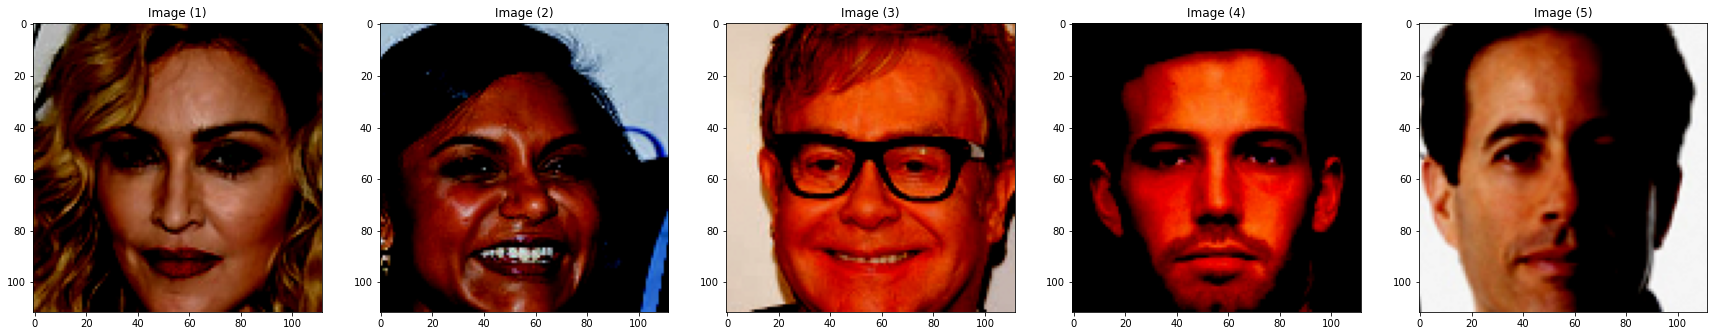

In [103]:
# Функция отображения изображений
def show_images(images, cols = 1, titles = None):

    # # Отображаем случайные top изображений
    # idxs = np.random.choice(images.shape[0], size=top, replace=False)
    # images = np.take(images, idxs, axis=0)

    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

# Посмотрим на 5 рандомных детекций лиц. Лица уже нормированы ((img - 127.5) * 0.0078125) как в бумаге ArcFace.
show_images(imgs)

Отличный результат. Можно двигаться дальше.

# 4. Обучение модели распознавания лиц

Для обучения я выбрал реализацию InsightFace на Keras - https://github.com/leondgarse/Keras_insightface. Модель обучалась на датасете Glint360K. В качестве бэкбона использовал ResNet100 + ArcFace Loss. Процесс обучения модели находится в ноутбуке **ArcFace.ipynb**. Далее рассмотрим инференс обученной модели.

In [104]:
from tensorflow.keras.models import load_model
import tensorflow as tf

tf.keras.mixed_precision.set_global_policy("mixed_float16")

In [105]:
# Загружаем модель
model_path = os.path.join(os.getcwd(), 'models', 'glint360k_cosface_r100_fp16_0.1.h5')
face_model = load_model(model_path, compile=False)

In [106]:
# Получаем вектора наших знаменитостей
embeddings = embedding_images(imgs, face_model)

embeddings.shape

(5, 512)

Получили готовые вектора лиц, которые можно использовать для дальнейшей идентификации.

# 5. Выравнивание лица

В своей работе я использовал функцию выравнивая лица, предложенную авторами InsightFace. Данная функция использует аффинное преобразование на картинке размером 112х112 пикселей. Ключевые точки заданы в массиве *src*.

In [107]:
# Функция из modules.face
def face_align_by_landmarks(img, landmarks, image_size=(112, 112), method="similar"):
    """
        Немного измененная функция InsightFace 
    """
    tform = transform.AffineTransform() if method == "affine" else transform.SimilarityTransform()
    src = np.array([[38.2946, 51.6963], [73.5318, 51.5014], [56.0252, 71.7366], [41.5493, 92.3655], [70.729904, 92.2041]], dtype=np.float32)
    ret = []
    for landmark in landmarks:
        tform.estimate(landmark, src)
        aligned_img = transform.warp(img, tform.inverse, output_shape=image_size)
        ret.append(aligned_img)

    return (np.array(ret) * 255).astype(np.uint8)

# Функция из библиотеки imutils, использует cv2
# from modules.face import FaceAligner
def face_align_by_eyes(self, image, left_eye, right_eye):

    desiredLeftEye=(0.35, 0.35)
    desiredFaceWidth=112
    desiredFaceHeight=None

    # centers of eyes
    leftEyeCenter = left_eye
    rightEyeCenter = right_eye

    # compute the angle between the eye centroids
    dY = rightEyeCenter[1] - leftEyeCenter[1]
    dX = rightEyeCenter[0] - leftEyeCenter[0]

    angle = np.arctan(dY/(dX + 1e-17))
    angle = (angle * 180) / np.pi

    # compute the desired right eye x-coordinate based on the
    # desired x-coordinate of the left eye
    desiredRightEyeX = 1.0 - desiredLeftEye[0]

    # determine the scale of the new resulting image by taking
    # the ratio of the distance between eyes in the *current*
    # image to the ratio of distance between eyes in the
    # *desired* image
    dist = np.sqrt((dX ** 2) + (dY ** 2))
    desiredDist = (desiredRightEyeX - desiredLeftEye[0])
    desiredDist *= desiredFaceWidth
    scale = desiredDist / dist

    # compute center (x, y)-coordinates (i.e., the median point)
    # between the two eyes in the input image
    eyesCenter = ((leftEyeCenter[0] + rightEyeCenter[0]) // 2,
        (leftEyeCenter[1] + rightEyeCenter[1]) // 2)

    # grab the rotation matrix for rotating and scaling the face
    M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)

    # update the translation component of the matrix
    tX = self.desiredFaceWidth * 0.5
    tY = self.desiredFaceHeight * desiredLeftEye[1]
    M[0, 2] += (tX - eyesCenter[0])
    M[1, 2] += (tY - eyesCenter[1])

    # apply the affine transformation
    (w, h) = (desiredFaceWidth, desiredFaceHeight)
    output = cv2.warpAffine(image, M, (w, h),
        flags=cv2.INTER_CUBIC)

    # return the aligned face
    return output

# 6. Pipeline

А теперь объединим все предыдущие шаги вместе и построим единый пайплайн распознавания.

В общем виде паплайн распознавания выглядит так: **INPUT_IMAGE** --> **FACE DETECTION** --> **FACE ALIGNMENT** --> **FACE EXTRACTION** --> **FEATURE MATCHING** --> **FACE ID**

In [132]:
from sklearn.preprocessing import normalize

# Создадим наш пайплайн
class FRSPipelineBuilder:
    def __init__(self, imgs: list, detector_model, face_model) -> None:
        # принимаем ссылки на изображения
        self.imgs = imgs

        # Загружаем модели
        self.fm = face_model
        self.detm = detector_model

        self.__embeddings = []

    def detect(self, imgs):
        images = []

        for img in imgs:
            img_bin = imread(img)
            img_bin = prepare_image(img_bin, self.detm)
            # Если обнаружено несколько лиц, берем 1
            if img_bin.shape[0] > 1:
                img_bin = np.expand_dims(img_bin[0], axis=0)
            # Если лиц не найдено - пропускаем файл
            if img_bin.shape[0] == 0:
                continue

            images.append(img_bin)

        self.imgs = np.concatenate(images, axis=0)

        return self

    def recognize(self, batch_size=32):
        steps = int(np.ceil(len(self.imgs) / batch_size))
        embeddings = [self.fm(self.imgs[ii * batch_size : (ii + 1) * batch_size]) for ii in range(steps)]
        embeddings = normalize(np.concatenate(embeddings, axis=0))

        self.__embeddings.append(embeddings)

        return self

    @property
    def get_embeddings(self):
        return np.concatenate(self.__embeddings, axis=0)

# Изображения для распознавания
samples = select_random_samples(dataset_files)

# Создаем наш пайплайн
frs = FRSPipelineBuilder(imgs, face_detector, face_model)
face_vectors = frs.detect(samples) \
                  .recognize() \
                  .get_embeddings



    

(5, 512)

Список используемой литературы:

https://medium.com/backprop-labs/face-recognition-pipeline-clearly-explained-f57fc0082750

https://sefiks.com/2020/02/23/face-alignment-for-face-recognition-in-python-within-opencv/

https://habr.com/ru/company/ntechlab/blog/531842/